In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
mod_names = ['ActionIn-sin-1-4-20-3', 'ActionIn-sin-1-1-20-3', 'ActionIn-one_hot-1-4-20-3', 'ActionIn-one_hot-1-1-20-3'] 
mod_names = ['ActionIn-sin-3-4-20-3', 'ActionIn-sin-3-1-20-3',
            'ActionIn-one_hot-3-4-20-3', 'ActionIn-one_hot-3-1-20-3']

In [9]:
log_dict = {}

for model_name in mod_names:
    log_list = []
    for res_folder in sorted(list(os.walk('../res'))[0][1]):
        if res_folder.startswith(model_name):
            try:
                log_list += [pd.read_csv(f'../res/{res_folder}/log.csv')]
            except (FileNotFoundError, NotADirectoryError) as e:
                    print(f"no log found for {res_folder}!")
    print(f'file loaded! log count: {len(log_list)}')
    log_dict[model_name] =  pd.concat(log_list)

file loaded! log count: 15
file loaded! log count: 15
file loaded! log count: 15
file loaded! log count: 15


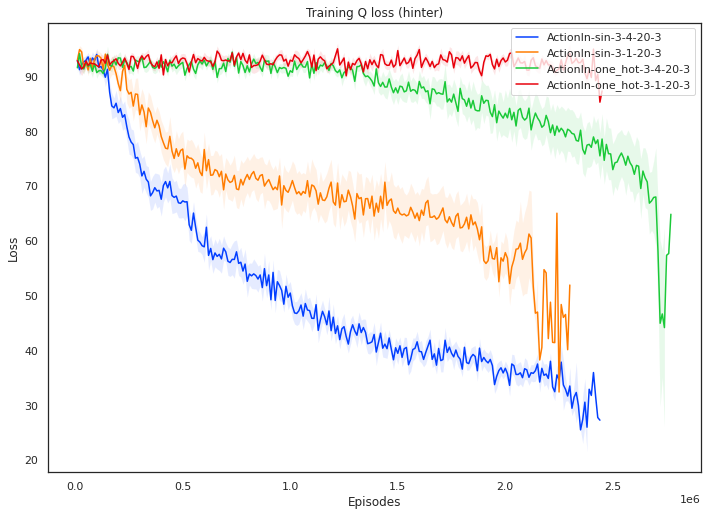

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.set_palette("bright")

for key, df in log_dict.items():
    rmean = df.groupby('episodes').mean().hinter_loss
    rstd = df.groupby('episodes').sem().hinter_loss
    x = df.groupby('episodes').mean().index
    sns.lineplot(x=x, y=rmean, label=key)
    plt.fill_between(x, rmean - rstd, rmean + rstd, alpha=0.1)
plt.ylabel("Loss")
plt.xlabel("Episodes")
plt.legend( loc="upper right")
plt.title('Training Q loss (hinter)')
plt.savefig('lc_diff.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

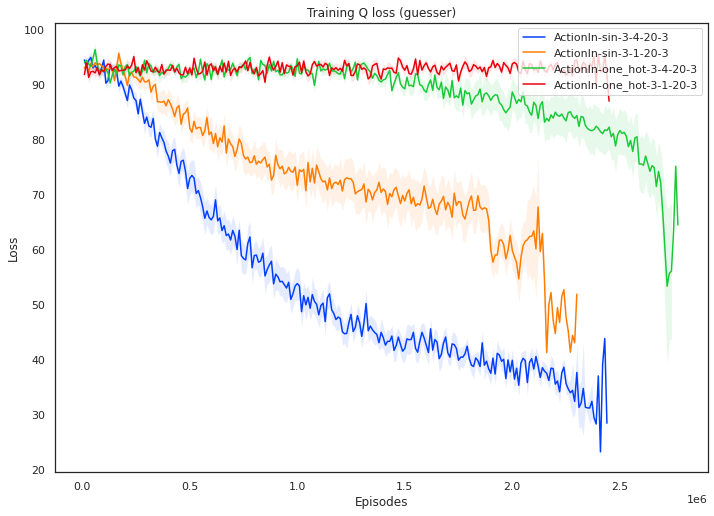

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.set_palette("bright")

for key, df in log_dict.items():
    rmean = df.groupby('episodes').mean().guesser_loss
    rstd = df.groupby('episodes').sem().guesser_loss
    x = df.groupby('episodes').mean().index
    sns.lineplot(x=x, y=rmean, label=key)
    plt.fill_between(x, rmean - rstd, rmean + rstd, alpha=0.1)
plt.ylabel("Loss")
plt.xlabel("Episodes")
plt.legend( loc="upper right")
plt.title('Training Q loss (guesser)')
plt.savefig('lc_diff.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

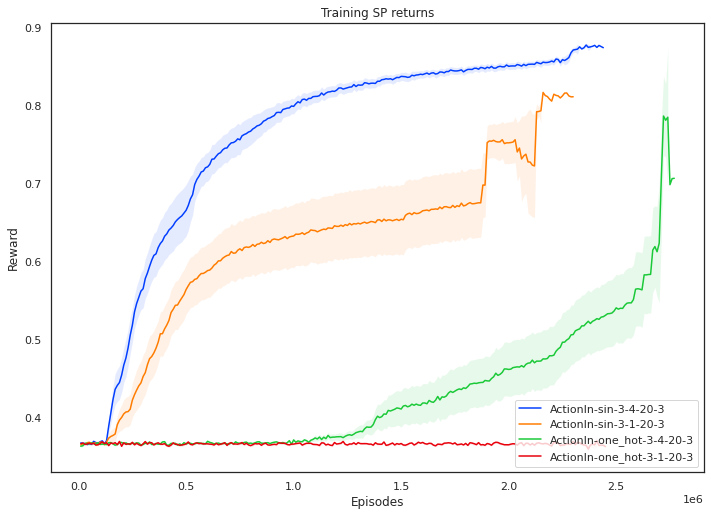

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.set_palette("bright")

for key, df in log_dict.items():
    rmean = df.groupby('episodes').mean()['return'] 
    rstd = df.groupby('episodes').sem()['return']
    x = df.groupby('episodes').mean().index
    sns.lineplot(x=x, y=rmean, label=key)
    plt.fill_between(x, rmean - rstd, rmean + rstd, alpha=0.1)
plt.ylabel("Reward")
plt.xlabel("Episodes")
plt.legend( loc="lower right")
plt.title('Training SP returns')
plt.savefig('lc_diff.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()